In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dfcopy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
dfcopy.duplicated().sum()

3

In [12]:
dfcopy=dfcopy.drop_duplicates()

In [13]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [14]:
dfcopy["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
dfcopy["species"].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
dfcopy["species"]=le.fit_transform(dfcopy["species"])

C:\Users\Aqsa Kanwal\AppData\Local\Temp\ipykernel_4192\1514971411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["species"]=le.fit_transform(dfcopy["species"])


In [18]:
dfcopy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
dfcopy["species"].unique()

array([0, 1, 2])

In [20]:
dfcopy["species"].value_counts()

species
1    50
2    49
0    48
Name: count, dtype: int64

C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


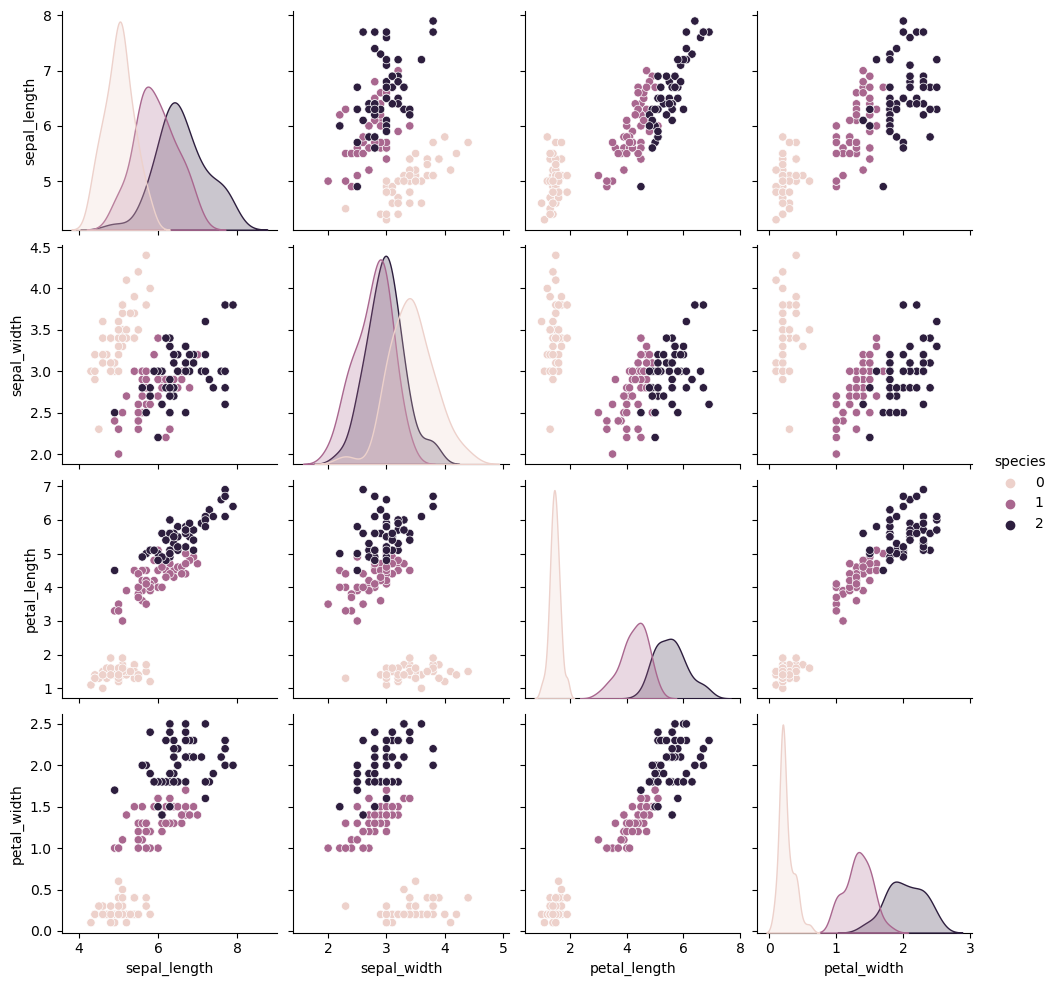

In [23]:
import seaborn as sns
sns.pairplot(dfcopy,hue='species')

In [24]:
dfcopy=dfcopy[dfcopy['species'] != 0][['sepal_length','sepal_width','species']]

In [27]:
dfcopy

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [28]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 50 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  99 non-null     float64
 1   sepal_width   99 non-null     float64
 2   species       99 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 2.7 KB


In [29]:
X=dfcopy.iloc[:,0:2]
y=dfcopy.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [34]:
estimators =[('lr',clf1),('rf',clf2),('kn',clf3)]

In [37]:
import numpy as np

In [38]:
for estimator in estimators:
    x=cross_val_score(estimator[1], X,y,cv=10,scoring="accuracy")
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.64
kn 0.66


In [39]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [40]:
vc=VotingClassifier(estimators=estimators,voting='hard')
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.71


# Soft Voting

In [41]:
vc=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc,X,y,cv=10,scoring="accuracy")
print(np.round(np.mean(x),2))

0.67


# Weighted Voting

In [42]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.68
for i=1,j=1,k=2 0.66
for i=1,j=1,k=3 0.66
for i=1,j=2,k=1 0.66
for i=1,j=2,k=2 0.67
for i=1,j=2,k=3 0.66
for i=1,j=3,k=1 0.66
for i=1,j=3,k=2 0.66
for i=1,j=3,k=3 0.64
for i=2,j=1,k=1 0.69
for i=2,j=1,k=2 0.68
for i=2,j=1,k=3 0.68
for i=2,j=2,k=1 0.69
for i=2,j=2,k=2 0.67
for i=2,j=2,k=3 0.67
for i=2,j=3,k=1 0.64
for i=2,j=3,k=2 0.68
for i=2,j=3,k=3 0.67
for i=3,j=1,k=1 0.7
for i=3,j=1,k=2 0.71
for i=3,j=1,k=3 0.68
for i=3,j=2,k=1 0.69
for i=3,j=2,k=2 0.68
for i=3,j=2,k=3 0.68
for i=3,j=3,k=1 0.66
for i=3,j=3,k=2 0.68
for i=3,j=3,k=3 0.69
